## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [53]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [2]:
df = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')
df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


In [89]:
# fit logistic regression using 'age' and 'chol' (cholesterol) as predictors
X = df[['age', 'chol']]
y = df['diagnosis']

pipe = Pipeline([
    ('model', LogisticRegression())
]).set_output(transform="pandas")

fitted_logreg = pipe.fit(X, y)

In [90]:
# extract coefs for age and chol from logistic regression
logreg_coefs = fitted_logreg.named_steps['model'].coef_
logreg_coefs

array([[0.04686331, 0.00180124]])

In [91]:
logreg_interc = fitted_logreg.named_steps['model'].intercept_
logreg_interc

array([-3.24011226])

In [92]:
w1 = logreg_coefs[0,0]
w2 = logreg_coefs[0,1]

In [93]:
log_z_50 = np.log(0.5/(1-0.5))
log_z_50

0.0

In [123]:
x2_50_lr = (log_z_50 - w1*55 - logreg_interc)/w2
x2_50_lr # cutoff level of cholsetrol level for a 55 y.o. to predict disease

array([367.8748898])

In [124]:
# find cutoff line point 1
x2_40_lr = (log_z_50 - w1*40 - logreg_interc)/w2
x2_40_lr # cutoff level of cholsetrol level for a 40 y.o. to predict disease

array([758.13391687])

In [125]:
# find cutoff line point
x2_65_lr = (log_z_50 - w1*65 - logreg_interc)/w2
x2_65_lr # cutoff level of cholsetrol level for a 66 y.o. to predict disease

array([107.70220509])

In [126]:
# make into df
co_df_1 = pd.DataFrame({'age': [40, 65], 'chol': [x2_40_lr[0], x2_65_lr[0]]})
co_df_1

,age,chol
0,40,758.133917
1,65,107.702205


In [46]:
# translate 0.9 prob to log form
log_z_90 = np.log(0.9/(1-0.9))
log_z_90

2.1972245773362196

In [47]:
x2 = (log_z_90 - w1*55 - logreg_interc)/w2
x2 # level of cholesterol at age 55, for 90% probability of prediction of disease

array([1587.71587928])

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [35]:
lda_pipe = Pipeline([
    ('model', LinearDiscriminantAnalysis())
]).set_output(transform="pandas")

fitted_lda = lda_pipe.fit(X, y)

In [36]:
lda_coefs = fitted_lda.named_steps['model'].coef_
lda_coefs

array([[0.04655744, 0.00178967]])

In [37]:
lda_interc = fitted_lda.named_steps['model'].intercept_
lda_interc

array([-3.21967766])

In [38]:
w1_lda = lda_coefs[0,0]
w2_lda = lda_coefs[0,1]
c_lda = lda_interc

In [119]:
x2_lda = (0 - w1_lda*55 - c_lda)/w2_lda
x2_lda # cutoff 'chol' level for 55 y.o to predict disease

array([368.23535753])

In [117]:
x2_40_lda = (0 - w1_lda*40 - c_lda)/w2_lda
x2_40_lda # cutoff 'chol' level for 40 y.o to predict disease

array([758.45403648])

In [118]:
x2_65_lda = (0 - w1_lda*65 - c_lda)/w2_lda
x2_65_lda # cutoff 'chol' level for 65 y.o to predict disease

array([108.08957156])

In [127]:
co_df_2 = pd.DataFrame({'age': [40, 65], 'chol': [x2_40_lda[0], x2_65_lda[0]]})

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [55]:
svc_pipe = Pipeline([
    ('model', SVC(kernel='linear')) # set seed kernel to 'linear', ref: https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html
]).set_output(transform="pandas")

In [58]:
gsvc = GridSearchCV(svc_pipe, param_grid={'model__C': [0.01, 0.1, 1, 10, 100]})
gsvc_fitted = gsvc.fit(X, y)

In [59]:
gsvc_fitted.best_params_

{'model__C': 0.1}

In [68]:
# input best param into pipeline
f_svc_pipe = Pipeline([
    ('model', SVC(kernel='linear', C=0.1)) # set seed kernel to 'linear', ref: https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html
]).set_output(transform="pandas")
f_svc_fitted = f_svc_pipe.fit(X, y)
f_svc_fitted

Pipeline(steps=[('model', SVC(C=0.1, kernel='linear'))])

In [67]:
# alt. version
final_svc = gsvc_fitted.best_estimator_
final_svc_fitted = final_svc.fit(X, y)
final_svc_fitted

Pipeline(steps=[('model', SVC(C=0.1, kernel='linear'))])

In [69]:
# extract coefs
svc_coefs = f_svc_fitted.named_steps['model'].coef_
svc_coefs

array([[0.06439804, 0.00366067]])

In [70]:
# intercept
svc_intercept = f_svc_fitted.named_steps['model'].intercept_
svc_intercept

array([-4.68655043])

In [73]:
# assign variables for equation
w1_svc = svc_coefs[0,0]
w2_svc = svc_coefs[0,1]
c_svc = svc_intercept

In [74]:
x2_svc = (0 - w1_svc*55 - c_svc)/w2_svc
x2_svc # cutoff 'chol' level for 55 y.o to predict disease

array([312.69049431])

In [128]:
x2_40_svc = (0 - w1_svc*40 - c_svc)/w2_svc
x2_40_svc # cutoff 'chol' level for 40 y.o to predict disease

array([576.56827861])

In [129]:
x2_65_svc = (0 - w1_svc*65 - c_svc)/w2_svc
x2_65_svc # cutoff 'chol' level for 65 y.o to predict disease

array([136.77197144])

In [130]:
co_df_3 = pd.DataFrame({'age': [40, 65], 'chol': [x2_40_svc[0], x2_65_svc[0]]})

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [75]:
from plotnine import *

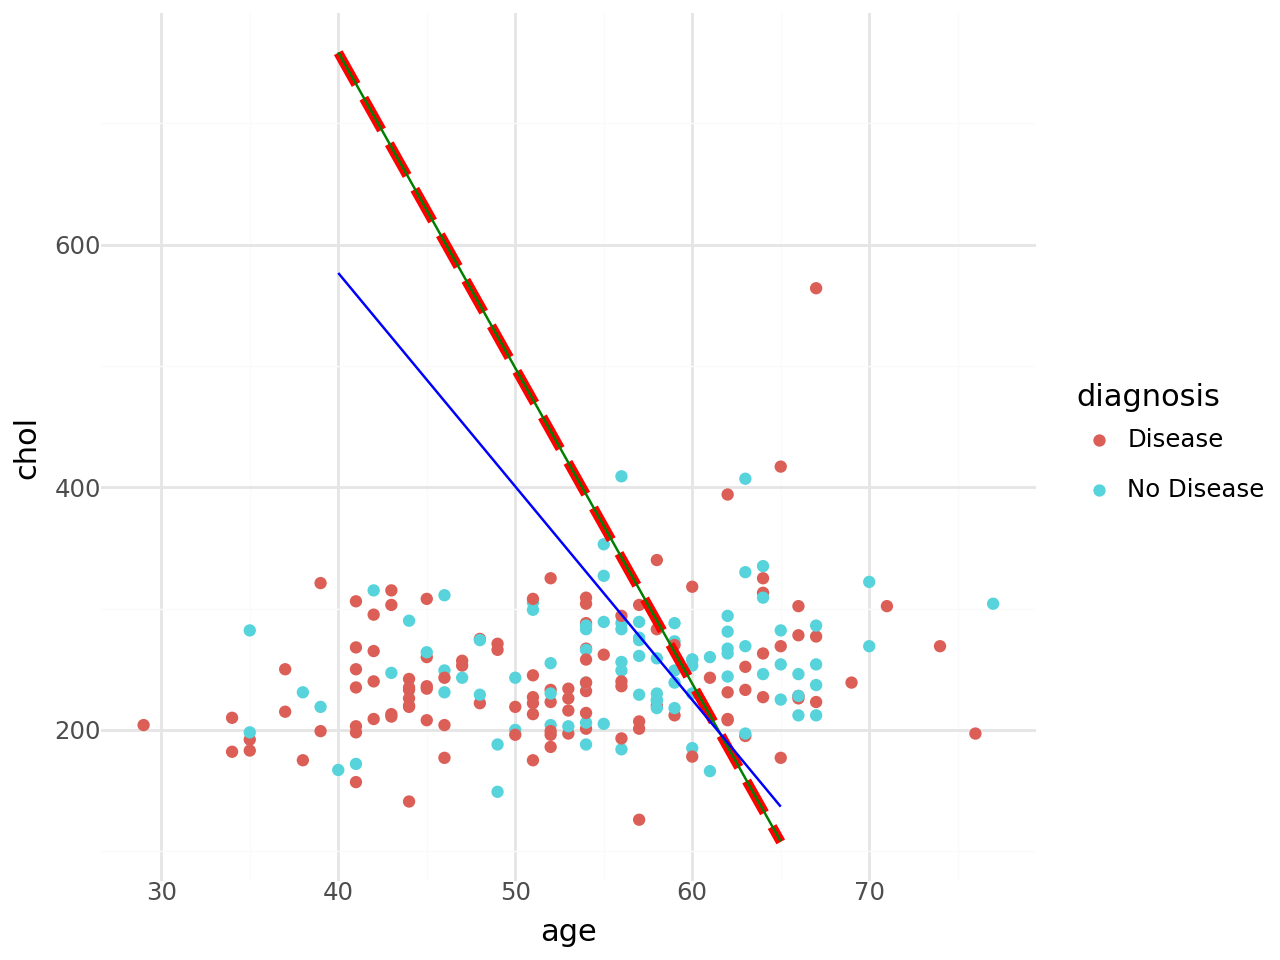

In [138]:
(ggplot(df, aes(x = 'age', y='chol'))
+ geom_point(aes(color='diagnosis'))
+ geom_line(co_df_1, color = 'red', size = 2, linetype = '--')
+ geom_line(co_df_2, color = 'green')
+ geom_line(co_df_3, color = 'blue')
+ theme_minimal()
 )